In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_yds_rec_salary_18-19')

In [3]:
tes.dtypes

NAME             object
YDS/REC         float64
YDS/REC_rank    float64
salary            int64
dtype: object

In [4]:
tes.head()

,NAME,YDS/REC,YDS/REC_rank,salary
0,Vernon Davis,14.7,4.0,5000000
1,Rob Gronkowski,14.5,5.0,9000000
2,Demetrius Harris,13.7,7.0,2100000
3,Jared Cook,13.2,8.5,5300000
4,Travis Kelce,13.0,10.0,9368400


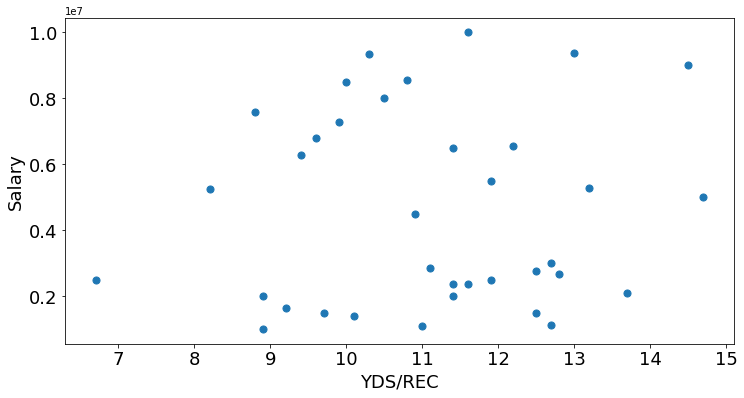

In [5]:
ax = tes.plot(kind="scatter", x = 'YDS/REC',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS/REC', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['YDS/REC', 'salary']])

In [7]:
X.mean(axis = 0)

array([-8.63506797e-17, -7.70988212e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.29324689, -0.84269243],
       [-0.5666785 ,  1.19922781],
       [ 0.46181943,  0.37099847],
       [ 0.56824824, -0.84000524],
       [ 1.67491955,  1.11028908]])

In [11]:
km.predict(X)

array([4, 4, 3, 2, 4, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 2, 3, 3, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,YDS/REC,YDS/REC_rank,salary,clusters
0,Vernon Davis,14.7,4.0,5000000,4
1,Rob Gronkowski,14.5,5.0,9000000,4
2,Demetrius Harris,13.7,7.0,2100000,3
3,Jared Cook,13.2,8.5,5300000,2
4,Travis Kelce,13.0,10.0,9368400,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[8.81428571e+00, 2.19047871e+06],
       [1.01000000e+01, 8.04444444e+06],
       [1.19200000e+01, 5.67000000e+06],
       [1.21083333e+01, 2.19818258e+06],
       [1.40666667e+01, 7.78946667e+06]])

In [14]:
tes.groupby('clusters')[['YDS/REC', 'salary']].mean()

,YDS/REC,salary
clusters,,
0,8.814286,2.190479e+06
1,10.100000,8.044444e+06
2,11.920000,5.670000e+06
3,12.108333,2.198183e+06
4,14.066667,7.789467e+06


In [15]:
centroids = tes.groupby('clusters')[['YDS/REC', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

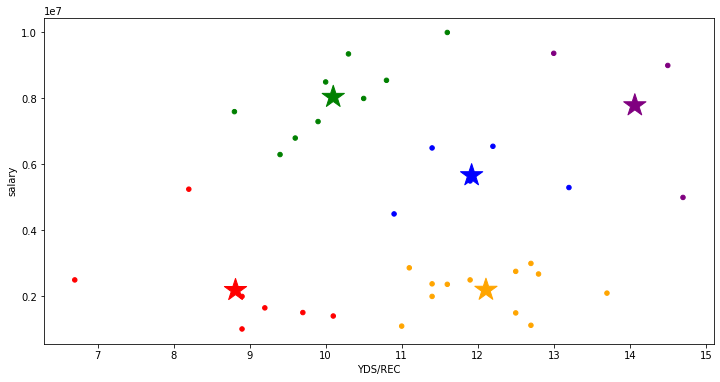

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'YDS/REC', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS/REC', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

13.277171286302398

In [18]:
silhouette_score(X, km.labels_)

0.4309798024519012